In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from scipy.stats import chi2_contingency
import scipy.stats as stats

# classification model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# metrics
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error as MSE

In [136]:
X = df = pd.read_csv(r'./../data/X.csv')
X.head()

,bank_accounts_open,credit_cards_held,homes_owned,household_size,average_balance,q1_balance,q2_balance,q3_balance,q4_balance,income_level,credit_rating,reward_Air Miles,reward_Cash Back,reward_Points,mailer_type_Letter,mailer_type_Postcard,overdraft_protection_No,overdraft_protection_Yes,own_your_home_No,own_your_home_Yes
0,1,2,1,4,1160.75,1669.0,877.0,1095.0,1002.0,2,2,1,0,0,1,0,1,0,1,0
1,1,2,2,5,147.25,39.0,106.0,78.0,366.0,1,1,1,0,0,1,0,1,0,0,1
2,2,2,1,2,276.50,367.0,352.0,145.0,242.0,2,1,1,0,0,0,1,1,0,0,1
3,2,1,1,4,1219.00,1578.0,1760.0,1119.0,419.0,1,2,1,0,0,1,0,1,0,1,0
4,1,2,1,6,1211.00,2140.0,1357.0,982.0,365.0,1,1,1,0,0,1,0,1,0,0,1


In [137]:
X.shape

(17976, 20)

In [138]:
y = df = pd.read_csv(r'./../data/y.csv')
y.head()

,offer_accepted
0,No
1,No
2,No
3,No
4,No


In [139]:
y_int = pd.Series(y.offer_accepted)
y_int.unique()

array(['No', 'Yes'], dtype=object)

In [140]:
y_int = y_int.apply(lambda x: 0 if x == 'No' else 1)
y_int

0        0
1        0
2        0
3        0
4        0
        ..
17971    0
17972    0
17973    0
17974    0
17975    0
Name: offer_accepted, Length: 17976, dtype: int64

In [141]:
y_int.value_counts()

offer_accepted
0    16955
1     1021
Name: count, dtype: int64

In [142]:
y_int.unique()

array([0, 1])

### X-y Split

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X, y_int, test_size=0.3, random_state=100)

In [144]:
def fit_classifier(X, y, model_type):
    '''choose model to apply
    'logistic_b' : classification binomial logistic regression
    'logistic_m' : classification multinomial logistic regression
    'knn' : k nearest neighbor classifier'''
    
    #train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
    
    if model_type == 'logistic_b':
        model = LogisticRegression(random_state=1, multi_class='ovr')
    elif model_type == 'logistic_m':
        model = LogisticRegression(random_state=1, multi_class='multinomial')
    elif model_type == "knn":
        k = int(input("k="))
        w = str(input("uniform or distance?"))
        model = KNeighborsClassifier(n_neighbors=k, weights=w)
    else:
        None
    
    model.fit(X_train, y_train)
    importance = model.coef_[0]
    summary = pd.DataFrame(np.abs(importance.round(2)), columns=['importance'], index=X.columns)
    summary = summary.sort_values('importance', ascending=False)
    prediction = model.predict(X_test)
    return prediction, summary


In [145]:
log_pred, importance_log = fit_classifier(X, y_int, 'logistic_b')
importance_log

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,importance
credit_rating,0.95
mailer_type_Letter,0.59
income_level,0.52
reward_Cash Back,0.48
mailer_type_Postcard,0.37
reward_Air Miles,0.26
homes_owned,0.19
bank_accounts_open,0.18
own_your_home_Yes,0.16
overdraft_protection_No,0.15


In [146]:
log_pred[:15]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [147]:
def plot_importance(list):
    plt.figure(figsize=(18,8))
    plt.suptitle('Feature Importance Scores', y=0.95)
    plot = sns.barplot(x = list.importance, y = list.index)
    return plot

<Axes: xlabel='importance'>

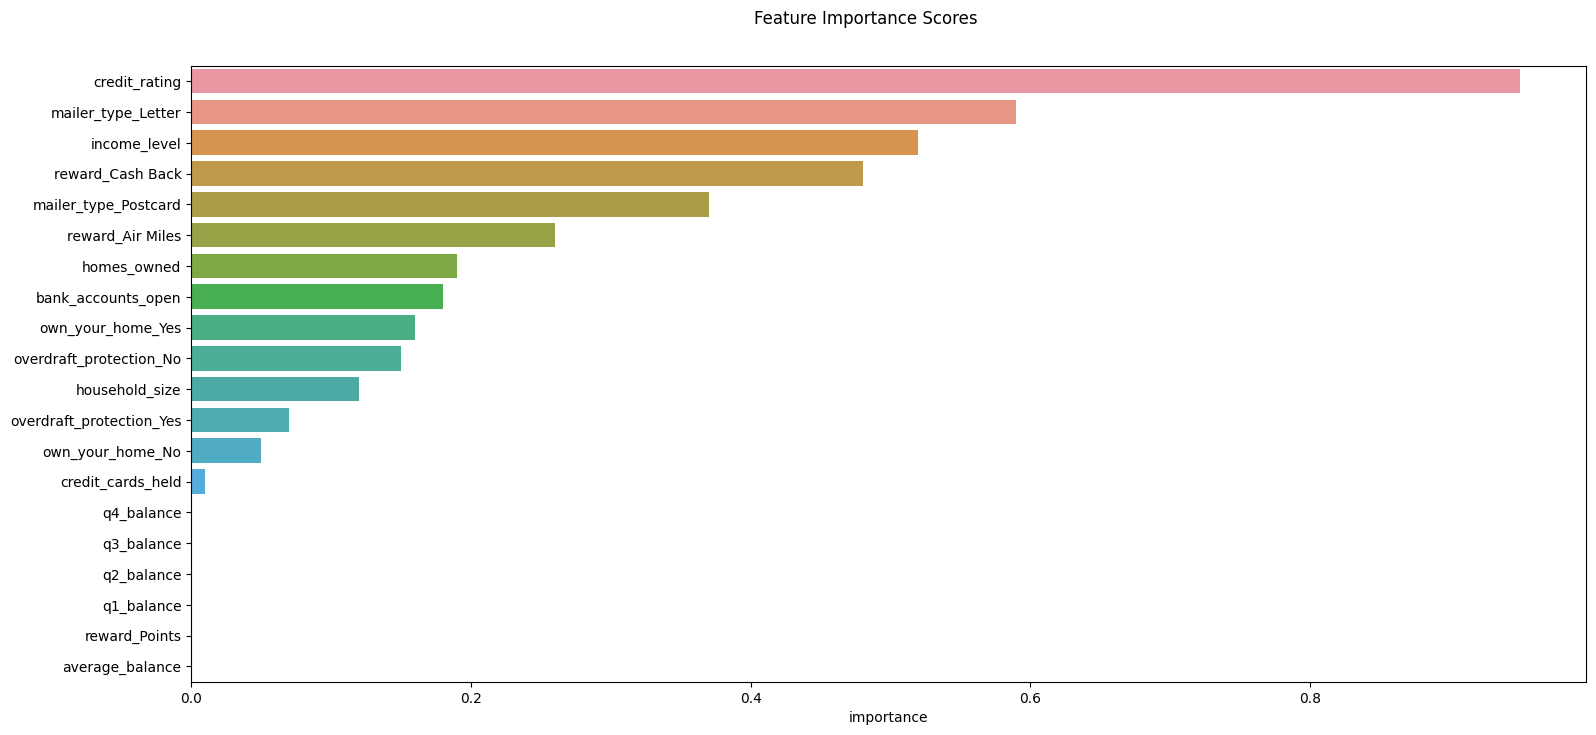

In [148]:
# Logistic Regression Feature Importance Scores
plot_importance(importance_log)

In [149]:
def metrics_class(actual, predicted):
    kappa = cohen_kappa_score(actual, predicted)
    accuracy = accuracy_score(actual, predicted)
    precision = precision_score(actual, predicted)
    recall = recall_score(actual, predicted)
    f1 = f1_score(actual, predicted)
    
    index = ['Cohen Kappa Score', 'Accuracy', 'Precision', 'Recall', 'F1']
    metrics = pd.Series([kappa, accuracy, precision, recall, f1], index=index)
    return metrics.round(2)


In [150]:
metrics_class(y_test, predict_log)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Cohen Kappa Score    0.00
Accuracy             0.94
Precision            0.00
Recall               0.00
F1                   0.00
dtype: float64

### Decision Tree Classifier Model

In [151]:
dt = DecisionTreeClassifier(random_state=1)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

In [152]:
metrics_class(y_test, dt_pred)

Cohen Kappa Score    0.06
Accuracy             0.90
Precision            0.11
Recall               0.12
F1                   0.12
dtype: float64

In [153]:
dt_mse = MSE(y_test, dt_pred)
dt_rmse = np.sqrt(dt_mse)

In [154]:
dt_rmse.round(2)

0.32

In [155]:
dt_entropy = DecisionTreeClassifier(criterion='entropy', random_state=1)
dt_entropy.fit(X_train, y_train)
dt_entropy_pred = dt_entropy.predict(X_test)

In [156]:
dt_ent_mse = MSE(y_test, dt_entropy_pred)
dt_ent_rmse = np.sqrt(dt_ent_mse)
dt_ent_rmse.round(2)

0.33

In [157]:
metrics_class(y_test, dt_entropy_pred)

Cohen Kappa Score    0.05
Accuracy             0.89
Precision            0.10
Recall               0.12
F1                   0.11
dtype: float64

In [158]:
def importance_dt(model):
    importance = model.feature_importances_
    summary = pd.DataFrame(importance.round(2), columns=['importance'], index=X.columns)
    summary = summary.sort_values('importance', ascending=False)
    return summary

In [159]:
importance_dt = importance_dt(dt)
importance_dt

,importance
q1_balance,0.16
q4_balance,0.16
q2_balance,0.15
q3_balance,0.15
average_balance,0.13
household_size,0.06
credit_cards_held,0.03
bank_accounts_open,0.02
mailer_type_Letter,0.02
credit_rating,0.02


<Axes: xlabel='importance'>

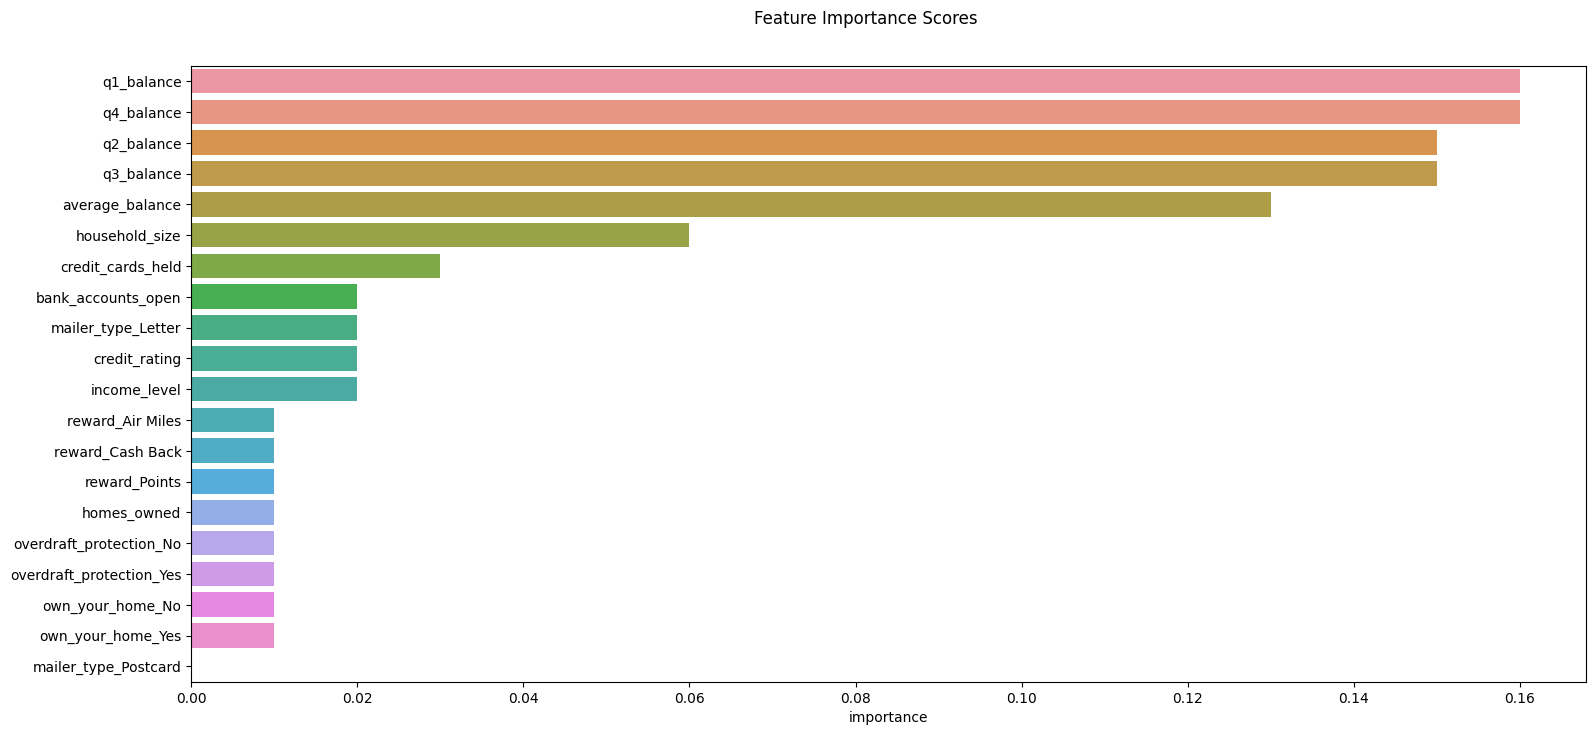

In [160]:
plot_importance(importance_dt)

### Random Forest Classifier

In [161]:
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)

In [162]:
rf_mse = MSE(y_test, rf_pred)
rf_rmse = np.sqrt(rf_mse)
rf_rmse.round(2)

0.24

In [167]:
# Create a df of features importances
importances = pd.DataFrame(data=rf.feature_importances_, columns=['importance'],
                        index= X_train.columns)

# Sort importances
importances_sorted = importances.sort_values('importance', ascending=False).round(3)
print(importances_sorted)

                          importance
q2_balance                     0.145
average_balance                0.143
q1_balance                     0.141
q3_balance                     0.140
q4_balance                     0.139
household_size                 0.058
credit_rating                  0.038
credit_cards_held              0.037
income_level                   0.029
bank_accounts_open             0.020
homes_owned                    0.019
own_your_home_Yes              0.013
own_your_home_No               0.013
reward_Air Miles               0.011
overdraft_protection_No        0.010
reward_Points                  0.010
overdraft_protection_Yes       0.010
reward_Cash Back               0.008
mailer_type_Letter             0.008
mailer_type_Postcard           0.007


<Axes: xlabel='importance'>

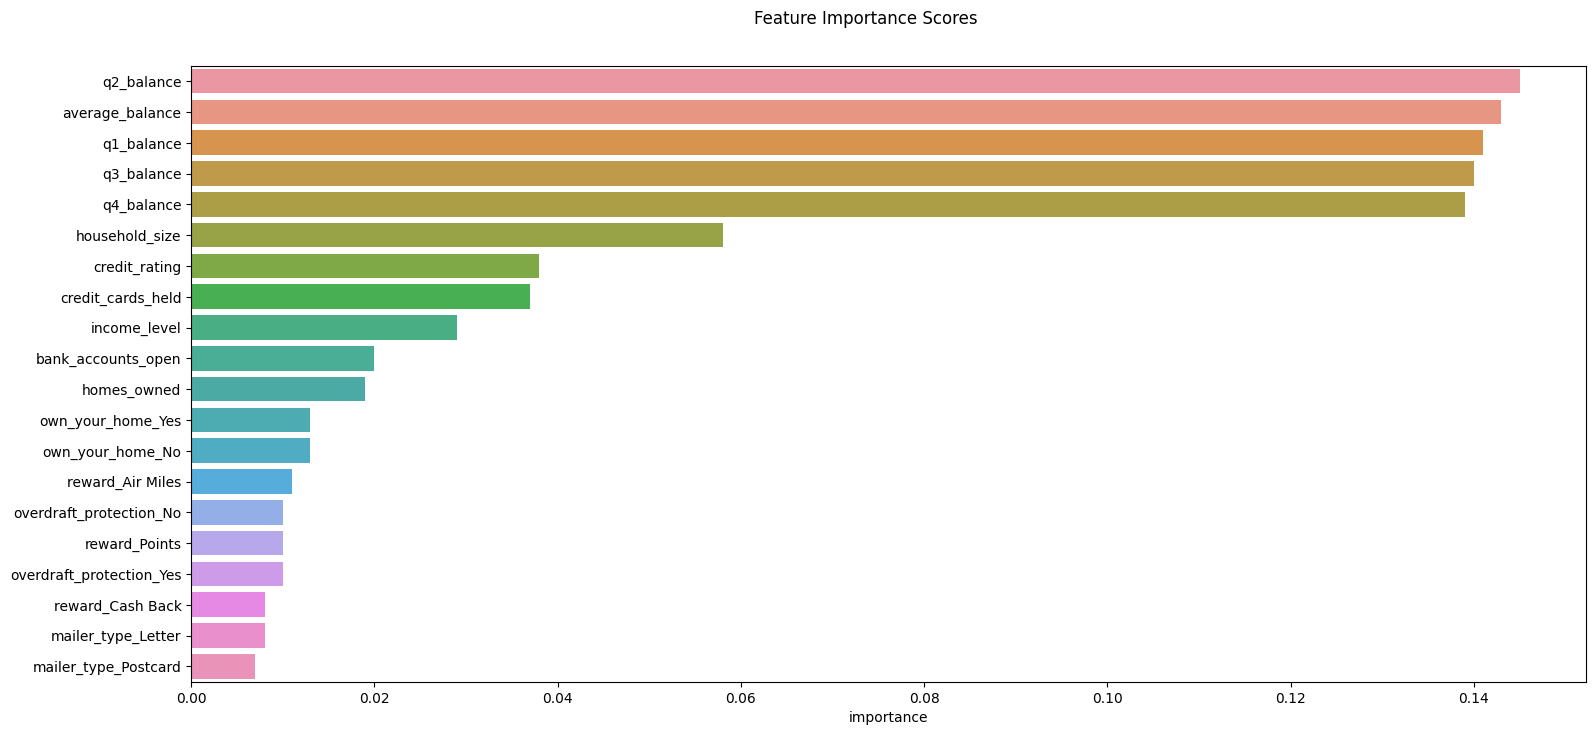

In [168]:
plot_importance(importances_sorted)